# Data Exploration

In [101]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [123]:
import numpy as np
import pandas as pd

In [124]:
df = pd.read_excel('eski_veriV2.xls', 
                 parse_dates={'dt' : ['Tarih', 'Saat']}, 
                  index_col='dt')

In [125]:
df.head()

,GIP USD,PTF (USD/MWh),GOP Islem Hacmi (USD),Toplam Uretim (MWh),Yenilenebilir Uretim,Doğal Gaz,Barajlı,Linyit,Akarsu,İthal Kömür,...,GIP (h-72),Demand (h-168),PTF (h-168),GIP (h-168),HOUR,MONTH,YEAR,DAY,WEEKDAY,Sistem Yönü (h-1)
dt,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00,9.259619,48.19,517628.066000,26261.65,10484.86,5703.53,4636.68,3686.37,3329.43,5475.19,...,58.898889,26471.26,45.93,39.265926,0,5,2016,1,7,1
2016-01-05 01:00:00,17.872493,35.72,373599.053071,25144.45,9996.44,5262.77,4229.74,3649.37,3388.04,5331.30,...,48.861090,25005.52,45.96,39.265926,1,5,2016,1,7,1
2016-01-05 02:00:00,7.347060,24.99,264766.836600,24052.60,9304.58,5171.30,3555.62,3550.88,3448.53,5123.93,...,44.620370,23983.51,43.82,37.481111,2,5,2016,1,7,1
2016-01-05 03:00:00,4.800000,0.12,18187.134857,23507.84,8988.91,5173.42,3259.57,3526.00,3423.78,4999.26,...,24.987407,23194.25,9.29,32.440794,3,5,2016,1,7,1
2016-01-05 04:00:00,4.289878,0.29,20371.792683,23179.01,9155.65,5252.19,3287.25,3402.97,3433.64,4639.93,...,24.987407,23155.13,1.78,2.655804,4,5,2016,1,7,1


In [126]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
# retrieve the array
data = df.values

In [127]:
# split into input and output elements
X, y = data[:, 1:], data[:, 0]

In [128]:
def split_train_test(df,n):
   
    return df[:n].copy(), df[n:].copy()

In [129]:
n_test = int(len(data) * 0.3)
n_train = len(data)-n_test
X_train, X_test = split_train_test(X, n_train)
y_train, y_test = split_train_test(y , n_train)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30677, 58), (30677,), (13147, 58), (13147,))

# Baseline Model Performance (Linear Regression)

In [130]:
df.isna().sum()

GIP USD                     0
PTF (USD/MWh)               0
GOP Islem Hacmi (USD)       0
Toplam Uretim (MWh)         0
Yenilenebilir Uretim        0
Doğal Gaz                   0
Barajlı                     0
Linyit                      0
Akarsu                      0
İthal Kömür                 0
Rüzgar                      0
Güneş                       0
Fuel Oil                    0
Jeotermal                   0
Asfaltit Kömür              0
Taş Kömür                   0
Biyokütle                   0
Nafta                       0
LNG                         0
Uluslararası                0
Demand                      0
Demand (h-1)                0
PTF (h-1)                   0
GIP (h-1)                   0
Pozitif dengesizlik(h-1)    0
Negatif dengesizlik(h-1)    0
Demand (h-2)                0
PTF (h-2)                   0
GIP (h-2)                   0
Pozitif dengesizlik(h-2)    0
Negatif dengesizlik(h-2)    0
Demand (h-3)                0
PTF (h-3)                   0
GIP (h-3) 

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 1.009


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_train)
# evaluate predictions
mae = mean_absolute_error(y_train, yhat)
print('MAE: %.3f' % mae)

MAE: 1.241


# Beyca Ders

In [110]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [112]:
df = pd.read_excel('kirpilmis_tl.xlsx', 
                 parse_dates={'dt' : ['Tarih', 'Saat']}, 
                  index_col='dt')

In [113]:
df.head()

,GIP AOF (TL/MWh),PTF (TL/MWh),Toplam Uretim (MWh),Yenilenebilir Uretim,Demand,Sistem Yönü (h-1)
dt,,,,,,
2016-08-05 00:00:00,133.11,130.00,26456.00,9730.87,27163.45,0
2016-08-05 01:00:00,120.60,119.96,25360.39,9517.26,25907.86,1
2016-08-05 02:00:00,64.98,70.00,24396.19,9187.93,24907.11,1
2016-08-05 03:00:00,10.00,0.86,23842.12,8849.38,23996.10,1
2016-08-05 04:00:00,10.00,0.94,23675.50,8818.16,23807.93,1


In [114]:
df.isna().sum()

GIP AOF (TL/MWh)        0
PTF (TL/MWh)            0
Toplam Uretim (MWh)     0
Yenilenebilir Uretim    0
Demand                  0
Sistem Yönü (h-1)       0
dtype: int64

In [115]:
#datayi hazirlamadan once bir train ve test diye ayiralim.
n = len(df)
train_df = df[:int(0.8*n)]
test_df = df[int(0.8*n):]
print(train_df.shape)
print(test_df.shape)

#simdi datayi normalize etmemiz lazim (butun deep learning modelleri icin bunu unutmamaliyiz)
#train datasi uzerinden normalize edecegiz.
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

(34924, 6)
(8732, 6)


In [116]:
#offset kac adim sonrasini tahmin etmek istedigimizle alakalidir.
#period kac tane datayi tahmin edecegimizle alakalidir.
#period offsetten buyuk olamaz.
#target_col = 1 yani 1.sutunu tahmin ediyoruz 0'i degil.
def make_data(data,lag = 72, offset = 2, period = 1, target_col = 0):
    X = []
    y = []
    for i in range(len(data) - lag - offset):
        X.append(data[i:i+lag,:])
        y.append(data[i+lag + offset - 1,target_col])

    return np.array(X), np.array(y)

In [117]:
lag = 72 #3 saat oncesine bakip sicakligi tahmin ediyor
offset = 2 #1 saat sonrasini tahmin ediyor.
period = 1
target_col = 1
n_features = train_df.shape[1]
#train_df.values dersek sade bir numpy arrayi olarak alir.
X_train, y_train = make_data(train_df.values, lag = lag, offset = offset, period = period,target_col = target_col)
X_test, y_test = make_data(test_df.values, lag = lag, offset = offset, period = period,target_col = target_col)
print(X_train.shape) #56k sample var her bir satirda 3 adim geriye bakmisim, 2 tane de featureimiz var.
print(X_train[:2])
print(y_train[:2])

(34850, 72, 6)
[[[-9.07622793e-01 -9.62710660e-01 -1.26030506e+00 -3.93265490e-01
   -1.14686651e+00 -8.29424802e-01]
  [-1.05972147e+00 -1.08209345e+00 -1.48101543e+00 -4.47345527e-01
   -1.39909217e+00  1.20562029e+00]
  [-1.73595874e+00 -1.67615362e+00 -1.67525329e+00 -5.30722609e-01
   -1.60012501e+00  1.20562029e+00]
  [-2.40441479e+00 -2.49827772e+00 -1.78687056e+00 -6.16433935e-01
   -1.78313068e+00  1.20562029e+00]
  [-2.40441479e+00 -2.49732646e+00 -1.82043612e+00 -6.24337960e-01
   -1.82093068e+00  1.20562029e+00]
  [-2.40441479e+00 -2.44916906e+00 -1.94890063e+00 -7.36042439e-01
   -1.95166480e+00  1.20562029e+00]
  [-2.40441479e+00 -2.50101258e+00 -2.18905090e+00 -1.04097020e+00
   -2.18637353e+00  1.20562029e+00]
  [-2.40441479e+00 -2.49601848e+00 -2.11199435e+00 -1.03311681e+00
   -2.09750526e+00  1.20562029e+00]
  [-2.44490149e+00 -2.49839662e+00 -1.79771863e+00 -7.10953110e-01
   -1.76267887e+00  1.20562029e+00]
  [-1.07431127e+00 -1.08197454e+00 -1.53088230e+00 -4.8944

In [170]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(64,input_shape = (lag, n_features)))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(period)) #activation linear olsun

In [171]:
model.compile(optimizer = 'adam',loss = 'mse', metrics = ['mape'])
history = model.fit(X_train,y_train, epochs = 10,  validation_data=(X_test, y_test))

Epoch 1/10
1090/1090 [==============================] - 32s 29ms/step - loss: 0.4430 - mape: 301.1786 - val_loss: 0.4333 - val_mape: 97.2678
Epoch 2/10
1090/1090 [==============================] - 31s 28ms/step - loss: 0.2541 - mape: 295.0730 - val_loss: 0.2784 - val_mape: 95.6775
Epoch 3/10
1090/1090 [==============================] - 30s 28ms/step - loss: 0.2136 - mape: 293.3136 - val_loss: 0.2581 - val_mape: 78.7836
Epoch 4/10
1090/1090 [==============================] - 30s 28ms/step - loss: 0.1992 - mape: 254.7543 - val_loss: 0.2539 - val_mape: 79.9401
Epoch 5/10
1090/1090 [==============================] - 30s 28ms/step - loss: 0.1890 - mape: 256.9627 - val_loss: 0.2329 - val_mape: 89.3190
Epoch 6/10
1090/1090 [==============================] - 30s 28ms/step - loss: 0.1817 - mape: 257.3768 - val_loss: 0.2381 - val_mape: 87.5069
Epoch 7/10
1090/1090 [==============================] - 30s 28ms/step - loss: 0.1752 - mape: 247.5282 - val_loss: 0.2352 - val_mape: 86.8786
Epoch 8/10
10

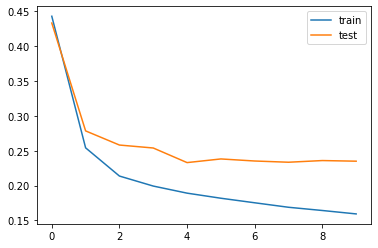

In [172]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

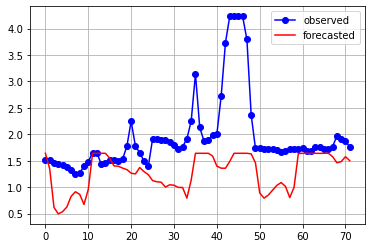

In [173]:
ypred = model.predict(X_test)

plt.plot(y_test[-72:], '-ob', label =  'observed')
plt.plot(ypred[-72:], '-r', label = 'forecasted')
plt.grid()
plt.legend()

In [174]:
ypred_old = (ypred * train_std[1]) + train_mean[1]

In [175]:
y_test_old = (y_test*train_std[1]) + train_mean[1]

In [176]:
ypred_old

array([[186.25581],
       [173.95726],
       [178.08777],
       ...,
       [335.74347],
       [343.5346 ],
       [337.12857]], dtype=float32)

In [177]:
y_test_old

array([220.  , 167.4 , 150.  , ..., 372.17, 369.02, 358.42])

In [178]:
from sklearn.metrics import mean_absolute_error as mae

In [179]:
mae(ypred_old,y_test_old)

24.365664443705366

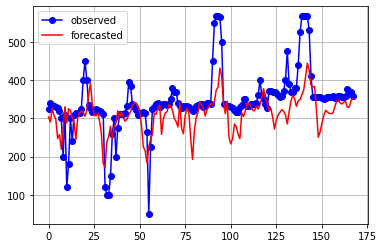

In [169]:
ypred = model.predict(X_test)

plt.plot(y_test_old[-168:], '-ob', label =  'observed')
plt.plot(ypred_old[-168:], '-r', label = 'forecasted')
plt.grid()
plt.legend()